In [2]:
pip install nhanes

Note: you may need to restart the kernel to use updated packages.


In [9]:
import numpy as np
import pandas as pd

np.random.seed(12345) 

from nhanes.load import load_NHANES_data

nhanes_data = load_NHANES_data() 
adult_nhanes_data = nhanes_data.query('AgeInYearsAtScreening > 18')
adult_nhanes_data = adult_nhanes_data.dropna(subset=['WeightKg']).rename(columns={'WeightKg': 'Weight'})

In [10]:
import scipy.stats
import statsmodels.stats.power as smp
import matplotlib.pyplot as plt

power_analysis = smp.TTestIndPower()
sample_size = power_analysis.solve_power(effect_size=0.5, power=0.8, alpha=0.05)
sample_size

63.76561177540974

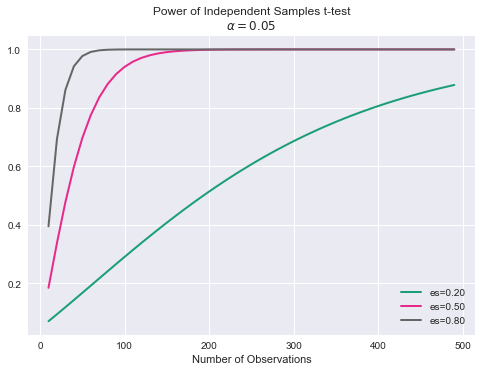

In [11]:
effect_sizes = np.array([0.2, 0.5, 0.8])
sample_sizes = np.array(range(10, 500, 10))

plt.style.use('seaborn')
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig = power_analysis.plot_power(
    dep_var='nobs', nobs=sample_sizes,  
    effect_size=effect_sizes, alpha=0.05, ax=ax, 
    title='Power of Independent Samples t-test\n$\\alpha = 0.05$')

In [12]:
num_runs = 5000
effectSize = 0.5

# perform power analysis to get sample size
power_analysis = smp.TTestIndPower()
sampleSize = power_analysis.solve_power(
    effect_size=effectSize, power=0.8, alpha=0.05)

# round up from estimated sample size
sampleSize = np.int(np.ceil(sampleSize))

# create a function that will generate samples and test for
# a difference between groups using a two-sample t-test


def get_t_result(sampleSize, effectSize):
    """
    perform a ttest on random data of n=sampSize
    """
    
    group1 = np.random.normal(loc=0.0, scale=1.0, size=sampleSize)
    group2 = np.random.normal(loc=effectSize, scale=1.0, size=sampleSize)
    ttresult = scipy.stats.ttest_ind(group1, group2)
    return(ttresult.pvalue)


# create input data frame for output
power_sim_results = pd.DataFrame({'p_value': np.zeros(num_runs)})

for run in range(num_runs):
    power_sim_results.loc[run, 'p_value'] = get_t_result(sampleSize, effectSize)


p_reject = np.mean(power_sim_results['p_value'] < 0.05)
p_reject

0.7994